In [3]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [4]:
from keras.layers import Dropout

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [6]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [7]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [8]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set image size to match VGG16 input
image_size = (150, 150)
batch_size = 32

datasetpath = "/content/drive/MyDrive/mini-project/SorghumWeedDataset/SorghumWeedDataset_Classification"
# 1. Load datasets

train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/drive/MyDrive/mini-project/SorghumWeedDataset/SorghumWeedDataset_Classification/Train',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='datasetpath +'/Validate'',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size
)

test_ds = keras.utils.image_dataset_from_directory(
    directory='datasetpath +'/Test'',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size
)

# 2. Define data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# 3. Apply augmentation to training data only
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


Found 3019 files belonging to 3 classes.
Found 862 files belonging to 3 classes.
Found 431 files belonging to 3 classes.


In [10]:
# Normalize
def process(image,label):

    image = tensorflow.cast(image/255.
                            ,tensorflow.float32)

    return image,label



In [11]:

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)
test_ds = test_ds.map(process)

In [12]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
   loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath='best_vgg16_model.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
]





In [14]:
import time

start_time = time.time()

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10,
    callbacks=callbacks
)

end_time = time.time()
elapsed_time = end_time - start_time




Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5457 - loss: 0.9389

95/95 ━━━━━━━━━━━━━━━━━━━━ 719s 7s/step - accuracy: 0.5473 - loss: 0.9365 - val_accuracy: 0.8689 - val_loss: 0.3983 - learning_rate: 1.0000e-05
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.9236 - loss: 0.2587

95/95 ━━━━━━━━━━━━━━━━━━━━ 30s 308ms/step - accuracy: 0.9236 - loss: 0.2584 - val_accuracy: 0.8875 - val_loss: 0.2719 - learning_rate: 1.0000e-05
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.9552 - loss: 0.1382

95/95 ━━━━━━━━━━━━━━━━━━━━ 29s 305ms/step - accuracy: 0.9552 - loss: 0.1381 - val_accuracy: 0.9142 - val_loss: 0.2195 - learning_rate: 1.0000e-05
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 29s 303ms/step - accuracy: 0.9673 - loss: 0.0982 - val_accuracy: 0.9339 - val_loss: 0.2204 - learning_rate: 1.0000e-05
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.9767 - loss: 0.0758

95/95 ━━━━━━━━━━━━━━━━━━━━ 29s 308ms/step - accuracy: 0.9767 - loss: 0.0759 - val_accuracy: 0.9385 - val_loss: 0.1794 - learning_rate: 1.0000e-05
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.9734 - loss: 0.0816

95/95 ━━━━━━━━━━━━━━━━━━━━ 30s 308ms/step - accuracy: 0.9734 - loss: 0.0816 - val_accuracy: 0.9362 - val_loss: 0.1703 - learning_rate: 1.0000e-05
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 29s 302ms/step - accuracy: 0.9779 - loss: 0.0648 - val_accuracy: 0.9501 - val_loss: 0.1860 - learning_rate: 1.0000e-05
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9807 - loss: 0.0531

95/95 ━━━━━━━━━━━━━━━━━━━━ 30s 310ms/step - accuracy: 0.9807 - loss: 0.0533 - val_accuracy: 0.9432 - val_loss: 0.1623 - learning_rate: 1.0000e-05
Epoch 9/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 30s 307ms/step - accuracy: 0.9821 - loss: 0.0558 - val_accuracy: 0.9200 - val_loss: 0.2496 - learning_rate: 1.0000e-05
Epoch 10/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 29s 304ms/step - accuracy: 0.9821 - loss: 0.0515 - val_accuracy: 0.9420 - val_loss: 0.1861 - learning_rate: 1.0000e-05


In [15]:
print(f"Training completed in {elapsed_time:.2f} seconds ({elapsed_time/60:.2f} minutes)")

Training completed in 984.81 seconds (16.41 minutes)


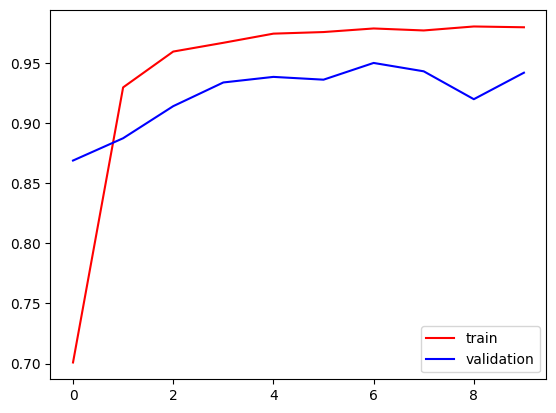

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

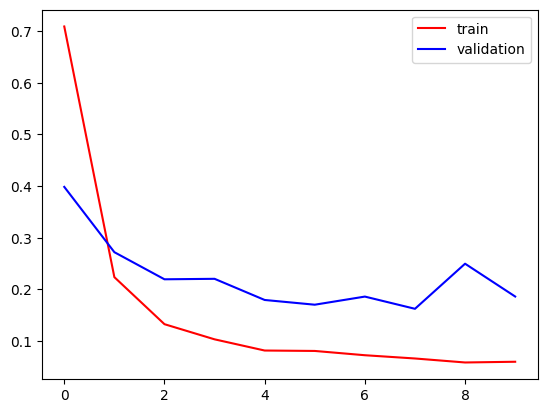

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [30]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9210 - loss: 0.1791
Test Accuracy: 0.9304
Test loss: 0.1726


In [19]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step
[[47 42 51]
 [48 63 36]
 [42 48 54]]
              precision    recall  f1-score   support

           0       0.34      0.34      0.34       140
           1       0.41      0.43      0.42       147
           2       0.38      0.38      0.38       144

    accuracy                           0.38       431
   macro avg       0.38      0.38      0.38       431
weighted avg       0.38      0.38      0.38       431



In [21]:
print(f"Test loss: {test_loss:.4f}")

Test loss: 0.1726


In [26]:
# from tensorflow.keras.utils import plot_model

# plot_model(model, to_file='/content/drive/MyDrive/mini-project/models/vgg16_model.png', show_shapes=True, show_layer_names=True)

In [25]:
#plot_model(conv_base, to_file='/content/drive/MyDrive/mini-project/models/vgg16_base.png',
         #  show_shapes=True, show_layer_names=True)



In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,071,624 (99.46 MB)

 Trainable params: 9,218,179 (35.16 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 9,218,181 (35.16 MB)

In [28]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [29]:
model.save('/content/drive/MyDrive/mini-project/models/vgg16_model.h5')

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names (adjust if needed)
class_names = ['Crop', 'Grass', 'Weed']

def show_predictions_with_labels(model, dataset, class_names=class_names, num_images=15):
    plt.figure(figsize=(15, 10))
    count = 0

    for images, labels in dataset:
        preds = model.predict(images)
        pred_classes = np.argmax(preds, axis=1)

        for i in range(len(images)):
            if count >= num_images:
                break

            true_label = labels[i].numpy()
            pred_label = pred_classes[i]

            plt.subplot(3, 5, count + 1)
            plt.imshow((images[i].numpy()*255).astype("uint8"))
            plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
            plt.axis('off')
            count += 1

        if count >= num_images:
            break

    plt.tight_layout()
    plt.show()

In [38]:
show_predictions_with_labels(model, test_ds)

Output hidden; open in https://colab.research.google.com to view.